## Extraction

In [1]:
%matplotlib inline

# Write column names

In [2]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "\n" 
    
    # return string  
    return (str1.join(s))

# Libraries Import

In [3]:
import numpy as np
import pandas as pd
# import xlrd
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
from pandas.api.types import CategoricalDtype

# For import export of model
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import export_graphviz
from sklearn import tree

from sklearn import metrics

import graphviz

# print(plt.style.available)
# mpl.style.use(['seaborn']) # optional: for ggplot-like style


# Data Related

## Data Import

In [4]:
datastore = pd.read_csv('D:\\OneDrive - Institute of Business Administration\\Work\\Duft Und Du\\user_fragrance_review.csv', header=0)

In [5]:
df = pd.DataFrame(data=datastore)
df

,ufr_id,fba_country_name,fba_time_zone,longevity,suitability,sustainability,apply_time,wear_off_time,indoor_time_percentage,number_of_sprays,...,fragrance_discontinued,fragrance_type,brand_id,brand,brand_discontinued,brand_tier,bo_location_country,bo_location_zone,fba_location_country,fba_location_zone
0,5,Pakistan,+05:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,Pakistan,+05:00
1,5,India,+05:30,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,India,+05:30
2,5,France,+02:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,France,+02:00
3,5,United Arab Emirates,+04:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,United Arab Emirates,+04:00
4,6,France,+02:00,132,NaN,13.2,2021-03-24 14:10:00,2021-03-24 16:22:00,90,1,...,NaN,Eau de Toilette,10,Lacoste,NaN,Mid,France,+02:00,France,+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,15,Pakistan,+05:00,153,NaN,153.0,2021-05-10 02:02:00,2021-05-10 04:35:00,100,1,...,NaN,Eau de Parfum,8,Bvlgari,NaN,High-End,Italy,+02:00,Pakistan,+05:00
89,15,United Arab Emirates,+04:00,153,NaN,153.0,2021-05-10 02:02:00,2021-05-10 04:35:00,100,1,...,NaN,Eau de Parfum,8,Bvlgari,NaN,High-End,Italy,+02:00,United Arab Emirates,+04:00
90,15,India,+05:30,153,NaN,153.0,2021-05-10 02:02:00,2021-05-10 04:35:00,100,1,...,NaN,Eau de Parfum,8,Bvlgari,NaN,High-End,Italy,+02:00,India,+05:30
91,15,Italy,+02:00,153,NaN,153.0,2021-05-10 02:02:00,2021-05-10 04:35:00,100,1,...,NaN,Eau de Parfum,8,Bvlgari,NaN,High-End,Italy,+02:00,Italy,+02:00


In [6]:
df.head()

,ufr_id,fba_country_name,fba_time_zone,longevity,suitability,sustainability,apply_time,wear_off_time,indoor_time_percentage,number_of_sprays,...,fragrance_discontinued,fragrance_type,brand_id,brand,brand_discontinued,brand_tier,bo_location_country,bo_location_zone,fba_location_country,fba_location_zone
0,5,Pakistan,+05:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,Pakistan,+05:00
1,5,India,+05:30,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,India,+05:30
2,5,France,+02:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,France,+02:00
3,5,United Arab Emirates,+04:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,NaN,Eau de Toilette,7,Brut,NaN,Low-End,France,+02:00,United Arab Emirates,+04:00
4,6,France,+02:00,132,NaN,13.2,2021-03-24 14:10:00,2021-03-24 16:22:00,90,1,...,NaN,Eau de Toilette,10,Lacoste,NaN,Mid,France,+02:00,France,+02:00


In [7]:
# df.columns

## Cleaning

In [8]:
df.drop(columns=['ufr_id', 'fba_country_name', 'fba_time_zone', 'suitability', 'sustainability', 'sillage', 'like', 'users_id', 'user_check', 'fragrance_id', 'brand_id', 'bo_location_country', 'fba_location_country', 'fba_location_zone', 'wear_off_time', 'indoor_time_percentage', 'projection', 'climate', 'fp_time_zone', 'fragrance_discontinued', 'brand_discontinued', 'bo_location_zone', 'weather_description'], inplace=True)
# Not included in dataset yet
# 'accord', 'ingredient',


# Write column name to files
with open("longevity_column_names_after_initial_drop.txt", "w") as f:
    f.write(listToString(df.columns))

In [9]:
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.shape

(12, 30)

In [10]:
df.isnull().sum()

longevity               0
apply_time              0
number_of_sprays        0
temp_avg                0
hum_avg                 0
dew_point_avg           0
uv_index_avg            0
temp_feels_like_avg     0
atm_pressure_avg        0
clouds_avg              0
visibility_avg          0
wind_speed_avg          0
rain_avg                9
snow_avg               12
weather_main            0
fp_id                   0
gender                  0
dob                     0
sweat                   1
height                  0
weight                  0
profession              0
skin_type               0
season                  0
fp_country              0
fragrance               0
fragrance_gender        0
fragrance_type          0
brand                   0
brand_tier              0
dtype: int64

In [11]:
# Missing Values
# df['suitability'].fillna(df['suitability'].median(), inplace=True)
# df['suitability'].fillna(int(df['suitability'].mean()), inplace=True)

# df['suitability'].fillna(int(0), inplace=True)

# df['projection'].fillna(int(0), inplace=True)
df['rain_avg'].fillna(int(0), inplace=True)
df['snow_avg'].fillna(int(0), inplace=True)

# df['user_check'].fillna(int(0), inplace=True)


df['sweat'].fillna(int(df['sweat'].mean()), inplace=True)


# df['fragrance_discontinued'].fillna(int(0), inplace=True)
# df['brand_discontinued'].fillna(int(0), inplace=True)


In [12]:
# df['skin_type']

In [13]:
# # create the dummies on the training data
# dummy_train = pd.get_dummies(df['skin_type'])
# dummy_train

In [14]:
# # create the dummies in the new (unseen data)
# test_df = pd.DataFrame(data=['Very Oily', 'low', 'Normal'], columns=['skin_type'])
# test_df['skin_type']

In [15]:
# dummy_new = pd.get_dummies(test_df['skin_type'])
# dummy_new

In [16]:
# # re-index the new data to the columns of the training data, filling the missing values with 0
# dummy_new.reindex(columns = dummy_train.columns, fill_value=0)
# dummy_new

In [17]:
# data['Temperature_encoded'] = data['Temperature'].map( {'low':0, 'medium':1, 'high':2})
# data[['Temperature', 'Temperature_encoded']]

### Data Types

In [18]:
df.dtypes

longevity                int64
apply_time              object
number_of_sprays         int64
temp_avg               float64
hum_avg                float64
dew_point_avg          float64
uv_index_avg           float64
temp_feels_like_avg    float64
atm_pressure_avg       float64
clouds_avg             float64
visibility_avg           int64
wind_speed_avg         float64
rain_avg               float64
snow_avg               float64
weather_main            object
fp_id                    int64
gender                  object
dob                     object
sweat                  float64
height                   int64
weight                   int64
profession              object
skin_type               object
season                  object
fp_country              object
fragrance               object
fragrance_gender        object
fragrance_type          object
brand                   object
brand_tier              object
dtype: object

In [19]:

# Datetime
df['dob']               = df['dob'].astype('datetime64[ns]')
df['apply_time']        = df['apply_time'].astype('datetime64[ns]')
# df['wear_off_time']     = df['wear_off_time'].astype('datetime64[ns]')

# Boolean
# df['fragrance_discontinued']    = df['fragrance_discontinued'].astype('bool')
# df['brand_discontinued']        = df['brand_discontinued'].astype('bool')


### Adding new 

In [20]:
# Calcualting Age
now = pd.to_datetime('now')
df['age'] = (now - df['dob']).dt.total_seconds() / (60*60*24*365.25)

# Type Cast
df['age'] = df['age'].astype('float')

# Drop dob
df.drop(['dob'],axis=1, inplace=True)

In [21]:
# Sorting out Dates

# Apply Time
df['apply_time_year']          = df['apply_time'].dt.year
df['apply_time_month']         = df['apply_time'].dt.month
df['apply_time_day']           = df['apply_time'].dt.day
df['apply_time_hour']          = df['apply_time'].dt.hour
df['apply_time_minute']        = df['apply_time'].dt.minute
df['apply_time_weekday_name']  = df['apply_time'].dt.day_name()

# Drop Apply Time & Wear Off Time
df.drop(['apply_time'],axis=1, inplace=True)

In [22]:
df.dtypes

longevity                    int64
number_of_sprays             int64
temp_avg                   float64
hum_avg                    float64
dew_point_avg              float64
uv_index_avg               float64
temp_feels_like_avg        float64
atm_pressure_avg           float64
clouds_avg                 float64
visibility_avg               int64
wind_speed_avg             float64
rain_avg                   float64
snow_avg                   float64
weather_main                object
fp_id                        int64
gender                      object
sweat                      float64
height                       int64
weight                       int64
profession                  object
skin_type                   object
season                      object
fp_country                  object
fragrance                   object
fragrance_gender            object
fragrance_type              object
brand                       object
brand_tier                  object
age                 

### Categorical Variables

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns.values
df = df.convert_dtypes()
categorical_columns

array(['weather_main', 'gender', 'profession', 'skin_type', 'season',
       'fp_country', 'fragrance', 'fragrance_gender', 'fragrance_type',
       'brand', 'brand_tier', 'apply_time_weekday_name'], dtype=object)

In [24]:
# new_df = pd.DataFrame(df['weather_main'].unique())
# new_df.insert(1, 'index', new_df.index)
# new_df = new_df.to_numpy()
# new_df

In [25]:
def resolve_categorical_variables(df, column_names_arr):

    dummies = {};
    
    for column_name in column_names_arr:
        
        oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        
        new_df = pd.DataFrame(df[column_name].unique())
        new_df.insert(1, 'index', new_df.index)

        dummies[column_name] = oe.fit(new_df.to_numpy())

        new_df = pd.DataFrame(df[column_name])
        new_df.insert(1, 'index', new_df.index)

        df[column_name] = oe.transform(new_df.to_numpy())
        
#     oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
#     dummies[column_names_arr] = oe.fit(df[column_names_arr])
    
#     df[column_names_arr] = oe.transform(df[column_names_arr])
    
    
    # Save dummies for prediction
    with open('longevity_dummies.pickle', 'wb') as f:
        pickle.dump(dummies, f)
        
    return df

In [26]:
df = resolve_categorical_variables(df, np.append(categorical_columns, ('fp_id')))

# Save columne names
file = open('longevity_column_names_after_cleaning_drop.txt', 'w')

# dump information to that file
file.write(listToString(df.columns))

# close the file
file.close()

df.columns

Index(['longevity', 'number_of_sprays', 'temp_avg', 'hum_avg', 'dew_point_avg',
       'uv_index_avg', 'temp_feels_like_avg', 'atm_pressure_avg', 'clouds_avg',
       'visibility_avg', 'wind_speed_avg', 'rain_avg', 'snow_avg',
       'weather_main', 'fp_id', 'gender', 'sweat', 'height', 'weight',
       'profession', 'skin_type', 'season', 'fp_country', 'fragrance',
       'fragrance_gender', 'fragrance_type', 'brand', 'brand_tier', 'age',
       'apply_time_year', 'apply_time_month', 'apply_time_day',
       'apply_time_hour', 'apply_time_minute', 'apply_time_weekday_name'],
      dtype='object')

In [27]:
# def resolve_categorical_variable(df, column_name):
#     df = pd.concat([df,pd.get_dummies(df[column_name], prefix=column_name)],axis=1)
#     df.drop([column_name],axis=1, inplace=True)
#     return df

# def resolve_categorical_variables(df, column_names_arr):
#     dummies = {};
    
#     for column_name in column_names_arr:
        
#         dummies[column_name] = pd.get_dummies(df[column_name], prefix=column_name)
        
#         df = pd.concat([df, dummies[column_name]], axis=1)
#         df.drop([column_name], axis=1, inplace=True)
    
#     # Save dummies for prediction
#     with open('longevity_dummies.pickle', 'wb') as f:
#         pickle.dump(dummies, f)
        
#     return df

In [28]:
df.dtypes

longevity                    Int64
number_of_sprays             Int64
temp_avg                   Float64
hum_avg                    Float64
dew_point_avg              Float64
uv_index_avg               Float64
temp_feels_like_avg        Float64
atm_pressure_avg           Float64
clouds_avg                 Float64
visibility_avg               Int64
wind_speed_avg             Float64
rain_avg                   Float64
snow_avg                     Int64
weather_main               float64
fp_id                      float64
gender                     float64
sweat                        Int64
height                       Int64
weight                       Int64
profession                 float64
skin_type                  float64
season                     float64
fp_country                 float64
fragrance                  float64
fragrance_gender           float64
fragrance_type             float64
brand                      float64
brand_tier                 float64
age                 

In [29]:
print(df.shape)
print(df.duplicated(keep='first').sum())

(12, 35)
0


In [30]:
# df.to_csv('cleaned.csv', header=True, index=True)

In [31]:
df.head()

,longevity,number_of_sprays,temp_avg,hum_avg,dew_point_avg,uv_index_avg,temp_feels_like_avg,atm_pressure_avg,clouds_avg,visibility_avg,...,fragrance_type,brand,brand_tier,age,apply_time_year,apply_time_month,apply_time_day,apply_time_hour,apply_time_minute,apply_time_weekday_name
0,14,7,78.42,21.75,35.66,6.39,72.09,1014.25,61.62,60000,...,1.0,0.0,1.0,23.355448,2021,3,4,17,21,2.0
4,132,1,90.76,30.38,49.41,10.34,86.04,1009.88,13.5,60000,...,1.0,3.0,2.0,22.232929,2021,3,24,14,10,4.0
10,150,2,90.52,54.75,71.41,10.9,97.95,1006.5,28.5,60000,...,1.0,3.0,2.0,22.3972,2021,5,4,2,30,3.0
16,60,4,88.12,31.12,52.49,9.65,85.86,1006.0,51.88,60000,...,1.0,3.0,2.0,24.217871,2021,5,6,16,0,2.0
22,119,1,93.66,43.0,65.04,11.54,97.97,1002.75,7.62,60000,...,1.0,4.0,2.0,22.3972,2021,5,10,2,31,1.0


In [32]:
# Use this and fix this
# aggregation_functions = {'longevity': 'first', 'amount': 'sum', 'name': 'first'}
# df_new = df.groupby(df['ufr_id']).aggregate(aggregation_functions)
# df_new.head()

In [33]:
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.shape

(12, 35)

In [34]:
# Columns with any null values
df.columns[df.isna().any()].tolist()

[]

In [35]:
df.reset_index(drop=True, inplace=True)
df.head()

,longevity,number_of_sprays,temp_avg,hum_avg,dew_point_avg,uv_index_avg,temp_feels_like_avg,atm_pressure_avg,clouds_avg,visibility_avg,...,fragrance_type,brand,brand_tier,age,apply_time_year,apply_time_month,apply_time_day,apply_time_hour,apply_time_minute,apply_time_weekday_name
0,14,7,78.42,21.75,35.66,6.39,72.09,1014.25,61.62,60000,...,1.0,0.0,1.0,23.355448,2021,3,4,17,21,2.0
1,132,1,90.76,30.38,49.41,10.34,86.04,1009.88,13.5,60000,...,1.0,3.0,2.0,22.232929,2021,3,24,14,10,4.0
2,150,2,90.52,54.75,71.41,10.9,97.95,1006.5,28.5,60000,...,1.0,3.0,2.0,22.3972,2021,5,4,2,30,3.0
3,60,4,88.12,31.12,52.49,9.65,85.86,1006.0,51.88,60000,...,1.0,3.0,2.0,24.217871,2021,5,6,16,0,2.0
4,119,1,93.66,43.0,65.04,11.54,97.97,1002.75,7.62,60000,...,1.0,4.0,2.0,22.3972,2021,5,10,2,31,1.0


In [36]:
# df.describe()

#### Saving columns to compare in prediction

In [37]:
with open('longevity_column_names_check.pickle', 'wb') as f:
    pickle.dump(df[df.columns.difference(['longevity'])].columns, f)

## Boosting the dataset

In [38]:
df = pd.concat([df, df, df, df], ignore_index=True)

In [39]:
copy_df = df

In [40]:
df = copy_df

# Model

## Train

In [41]:
# define the target variable (dependent variable) as y
y = df.longevity
y = y.astype('float64')

df.drop('longevity', axis=1, inplace=True)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(33, 34) (33,)
(15, 34) (15,)


In [42]:
# Create Decision Tree classifer object
# model_init = DecisionTreeRegressor(random_state = 0, criterion='mse')

model_init = RandomForestClassifier(n_estimators=9, random_state=100)

# Logistic Regression
# model_init = LogisticRegression()

In [43]:
# Train Decision Tree Classifer
model = model_init.fit(X_train, y_train)

## Test

In [44]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [45]:
y_pred

array([160.,  90., 153., 270., 119.,  14., 160., 153., 132., 320., 150.,
        14., 160., 160., 132.])

In [46]:
y_test

33    273.0
30     90.0
11    153.0
29    270.0
16    119.0
36     14.0
45    273.0
35    153.0
1     132.0
22    320.0
2     150.0
0      14.0
9     273.0
21    273.0
13    132.0
Name: longevity, dtype: float64

In [47]:
# X_test.dtypes

In [48]:
# Test
# y_pred = lm.predict(X_test)
# from sklearn.model_selection import cross_val_predict
# predicted = cross_val_predict(lm, df_long, y, cv=10)

# fig, ax = plt.subplots()
# ax.scatter(y, predicted)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

## Evaluate

In [49]:
# Decision Tree
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

# tree.plot_tree(model, feature_names = X_train.columns, 
#                class_names=y,
#                filled = True);

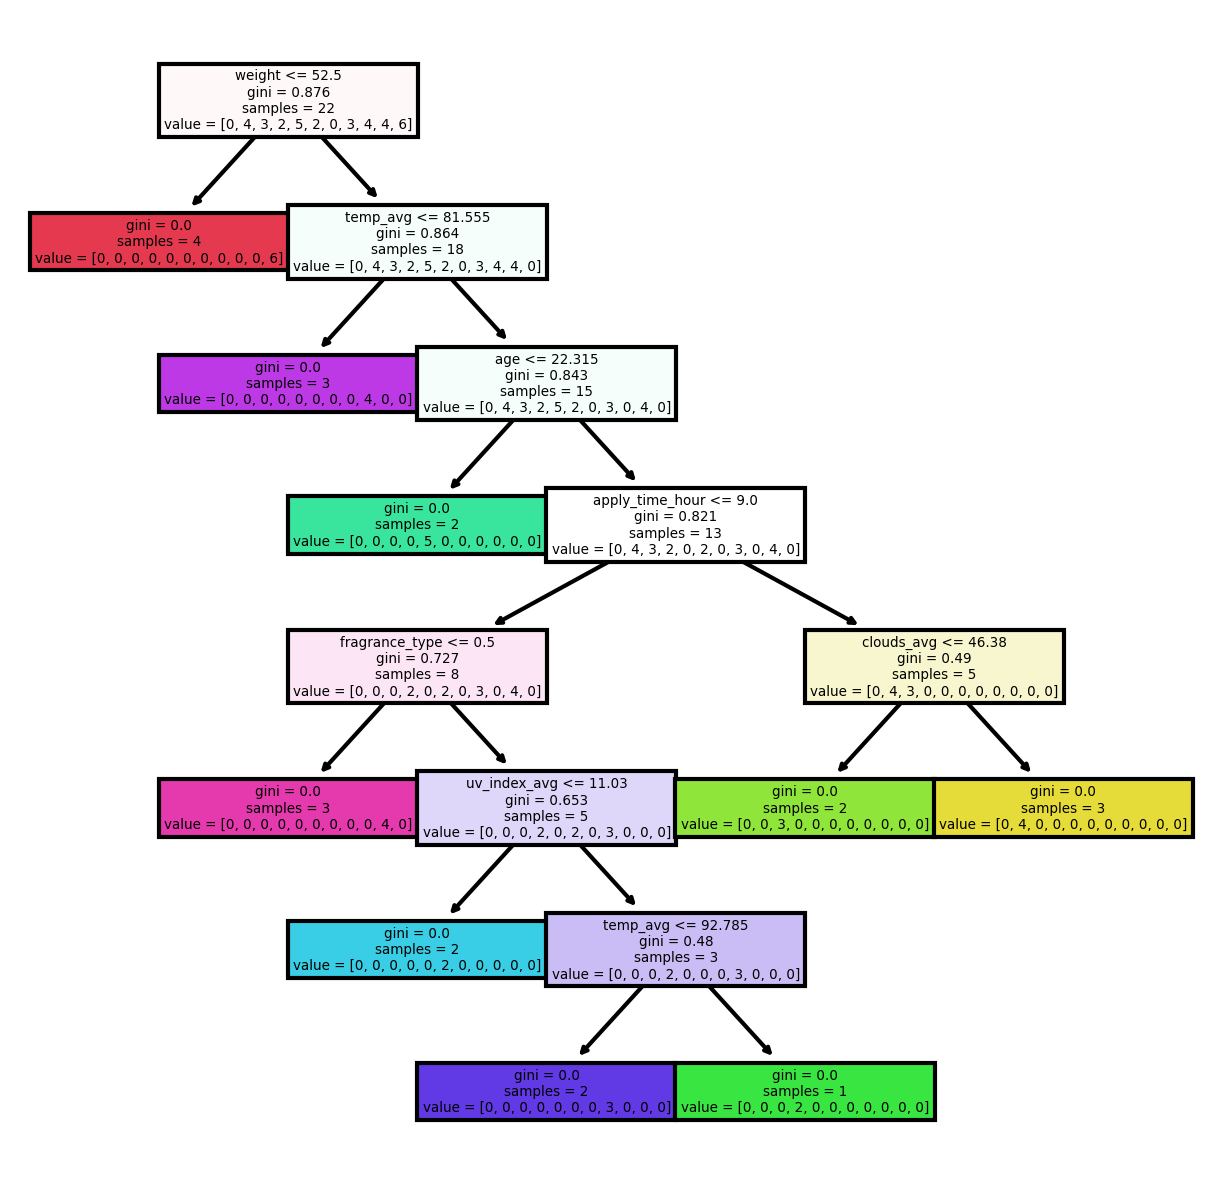

In [50]:
# Random Forest
limited_estimator = model.estimators_[1]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=300)
tree.plot_tree(limited_estimator,
               feature_names = X_train.columns, 
               filled = True);

fig.savefig('rf_individualtree.png')

In [51]:
# estimator_limited = model.estimators_[5]

# # Export as dot file
# dot_data = export_graphviz(estimator_limited, 
#                 out_file='rf_tree.dot',
#                 feature_names = X_train.columns,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# graph = graphviz.Source(dot_data)
# graph.view()
# # graph.render("DecisionTree") #Generate DecisionTree.pdf file in the same directory

In [52]:

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
# tree = export_graphviz(model, out_file ='tree.dot', feature_names = X_train.columns)
# tree.render()

In [53]:
## The line / model
# plt.scatter(y_test, y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")

In [54]:
# The coefficients
# print('Coefficients: \n', model.coef_)
# The mean squared error
# print('Mean squared error: %.2f'
#       % metrics.mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.2f'
#       % metrics.r2_score(y_test, y_pred))

# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30.133333333333333
Mean Squared Error: 3405.0666666666666
Root Mean Squared Error: 58.352949082858416


### Fit over the full dataset

In [56]:
model = model_init.fit(df, y)

In [57]:
# model.predict(df)

## Save the vars pickle for prediction

### Model

In [58]:
with open('longevity_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [59]:
with open('longevity_model.pickle', 'rb') as f:
    loaded_pickle = pickle.load(f)
    
loaded_pickle

RandomForestClassifier(n_estimators=9, random_state=100)

### Categorical Variables

In [60]:
with open('longevity_dummies.pickle', 'rb') as f:
    train_dummies = pickle.load(f)

# Categorical variables in a dataframe
cat_df = pd.DataFrame(data = train_dummies.keys())
# for column_name in train_dummies:
#     for dummy in train_dummies[column_name]:
#         cat_df[dummy] = 0
        
# Save in file
with open('longevity_categorical_variables.pickle', 'wb') as f:
    pickle.dump(cat_df, f)
    
cat_df

,0
0,weather_main
1,gender
2,profession
3,skin_type
4,season
5,fp_country
6,fragrance
7,fragrance_gender
8,fragrance_type
9,brand


In [61]:
# with open('longevity_dummies.pickle', 'rb') as f:
#     print(pickle.load(f).keys())

# END